This is the code to classify diabetic or non-diabetic patients using Support Vector Machine with Stochastic Gradient Descent

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load Dataset
df = pd.read_csv('Diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Change outcome labels from 0 and 1 to -1 and 1 for SVM
data = df.values
X = data[:, :-1]
y = data[:, -1]
y = 2 * y - 1
df.head(10) # This will not change the original dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


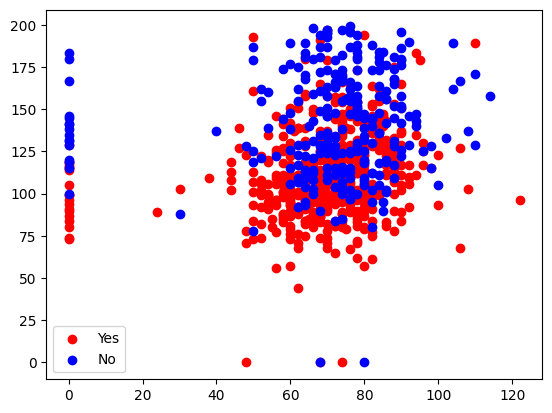

In [4]:
# Plot the data
index_1 = 2
index_2 = 1

vals_minus1 = X[y == -1]
vals_plus1 = X[y == 1]

plt.scatter(vals_minus1[ :, index_1], vals_minus1[ :, index_2], color = 'red', label = 'Yes')
plt.scatter(vals_plus1[ :, index_1], vals_plus1[ :, index_2], color = 'blue', label = 'No')
plt.legend()

In [5]:
class SVMClassifier: 
    '''
    SVM Classifier with SGD
    '''

    def __init__(self, learning_rate = 1e-4, lambda_param = 1e-4, max_iter = 10000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.max_iter = max_iter
        self.w = None # Weights
        self.b = None # Bias
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []

    def hinge_loss(self, X, y):
        '''
        hinge = max(0, 1 - y * (np.dot(X, self.w) + self.b)) + lambda * ||w||^2
        hinge_loss = np.mean(hinge_loss)
        '''

        classification_term = 1 - y * (np.dot(X, self.w) + self.b)
        regularization_term = self.lambda_param * (np.linalg.norm(self.w) ** 2) # lambda * ||w||^2
        hinge = np.maximum(0, classification_term)
        hinge_loss = np.mean(hinge) + regularization_term
        return hinge_loss
    
    def derivative_hinge_loss(self, err, xi, yi):
        '''
        The derivative of the hinge loss wrt W is dhinge_loss/dW

        2 * lambda * W              if y * (W . X + b) > 1
        2 * lambda * W - y * X      otherwise

        The deraivative of the hinge loss wrt b is dhinge_loss/db
        0                           if y * (W . X + b) > 1
        -y                          otherwise
        '''

        if err > 1:
            dw = 2 * self.lambda_param * self.w
            db = 0
        else:
            dw = 2 * self.lambda_param * self.w - yi * xi
            db = -yi
        return dw, db
    
    def fit(self, X, y, X_val, y_val): 
        '''
        Train the model with Gradient Descent
        '''

        # Initialize weights and bias
        self.w = np.ones(X.shape[1])
        self.b = 1

        for j in range(self.max_iter):
            for i, xi in enumerate(X):

                # Calculate the error
                err = y[i] * (np.dot(X[i], self.w) + self.b)

                # Update weights
                dw, db = self.derivative_hinge_loss(err, X[i], y[i])
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db

            if j % 100 == 0:
                # Update loa\ss and accuracy lists
                self.train_loss.append(self.hinge_loss(X, y))
                self.train_acc.append(self.get_accuracy(X, y))
                self.val_loss.append(self.hinge_loss(X_val, y_val))
                self.val_acc.append(self.get_accuracy(X_val, y_val))

        return self.w, self.b
    
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)
    
    def get_accuracy(self, X, y):
        '''
        Accuracy = 1 - (number of misclassified samples / total number of samples)
        '''

        correct = self.predict(X) == y
        acc = np.sum(correct) / len(y) * 100
        return acc

In [6]:
'''
Split the data into train and test dataset
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val = X_test
y_val = y_test

In [7]:
'''
Train the model
'''

svm_model = SVMClassifier()
svm_model.fit(X_train, y_train, X_val, y_val)

(array([ 1.32966615e-01,  5.15763892e-02, -4.02653410e-02,  1.86637594e-03,
        -7.33884636e-05,  1.47368604e-01,  1.31074794e+00,  4.12051528e-02]),
 -13.057699999982812)

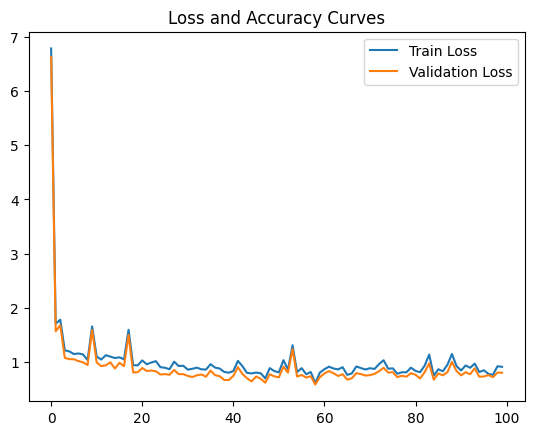

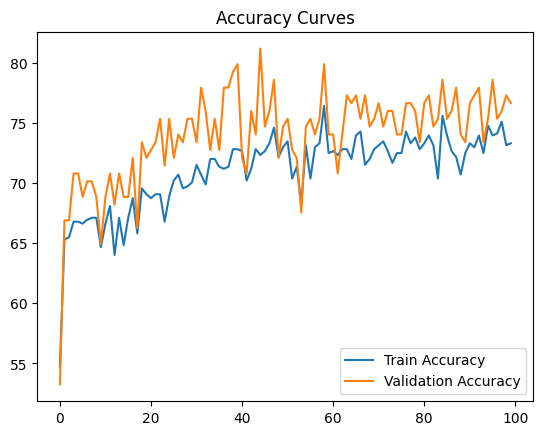

In [8]:
'''
Plot Curves
'''

plt.title('Loss and Accuracy Curves')
plt.plot(svm_model.train_loss, label = 'Train Loss')
plt.plot(svm_model.val_loss, label = 'Validation Loss')
plt.legend()
plt.show()

plt.title('Accuracy Curves')
plt.plot(svm_model.train_acc, label = 'Train Accuracy')
plt.plot(svm_model.val_acc, label = 'Validation Accuracy')
plt.legend()
plt.show()

In [9]:
svm_model.get_accuracy(X_test, y_test)

78.57142857142857

In [10]:
svm_model.hinge_loss(X_test, y_test)

0.6853713473241048